# 🍷 Wine Quality - Exploratory Data Analysis (EDA)

## Mục tiêu
Từ dữ liệu gốc → hiểu rõ cấu trúc, chất lượng, xu hướng và các yếu tố ảnh hưởng đến biến mục tiêu `quality`.

---

## 📊 Bước 1: Khám phá và hiểu dữ liệu (Data Understanding)

**Mục tiêu:** Nắm được phạm vi, kiểu dữ liệu, ý nghĩa từng biến và mối liên hệ giữa chúng.

In [22]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Đã import thành công các thư viện cần thiết!")

✅ Đã import thành công các thư viện cần thiết!


### 1.1 Đọc dữ liệu

In [23]:
# Đọc dữ liệu
df = pd.read_csv('winequality_red.csv')

print(f"📊 Kích thước dữ liệu: {df.shape[0]} dòng x {df.shape[1]} cột")
print("\n🔍 5 dòng đầu tiên:")
df.head()

📊 Kích thước dữ liệu: 1599 dòng x 12 cột

🔍 5 dòng đầu tiên:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.2 Kiểm tra thông tin cơ bản về dữ liệu

In [24]:
# Kiểm tra thông tin về các cột
print("📋 THÔNG TIN CÁC CỘT:")
print("="*60)
df.info()

📋 THÔNG TIN CÁC CỘT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 1.3 Thống kê mô tả

In [25]:
# Thống kê mô tả
print("📊 THỐNG KÊ MÔ TẢ:")
print("="*60)
df.describe().round(2)

📊 THỐNG KÊ MÔ TẢ:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### 1.4 Xác định biến mục tiêu và đặc trưng

In [26]:
# Xác định biến mục tiêu và features
target = 'quality'
features = df.columns.drop(target).tolist()

print(f"🎯 Biến mục tiêu: {target}")
print(f"\n📊 Các đặc trưng ({len(features)} features):")
for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

# Phân phối của biến mục tiêu
print(f"\n📈 Phân phối chất lượng rượu (quality):")
print(df[target].value_counts().sort_index())

🎯 Biến mục tiêu: quality

📊 Các đặc trưng (11 features):
  1. fixed acidity
  2. volatile acidity
  3. citric acid
  4. residual sugar
  5. chlorides
  6. free sulfur dioxide
  7. total sulfur dioxide
  8. density
  9. pH
  10. sulphates
  11. alcohol

📈 Phân phối chất lượng rượu (quality):
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


### 1.5 Ý nghĩa các đặc trưng

**Các biến hóa học và vật lý:**

1. **fixed acidity**: Độ acid cố định (g/L) - acid không bay hơi như tartaric acid
2. **volatile acidity**: Độ acid dễ bay hơi (g/L) - chủ yếu là acetic acid, nếu cao → vị giấm không mong muốn
3. **citric acid**: Acid citric (g/L) - tạo vị tươi mát
4. **residual sugar**: Đường dư (g/L) - đường còn lại sau lên men
5. **chlorides**: Muối clorua (g/L) - lượng muối trong rượu
6. **free sulfur dioxide**: SO₂ tự do (mg/L) - chống oxi hóa và vi khuẩn
7. **total sulfur dioxide**: Tổng SO₂ (mg/L) - SO₂ tự do + SO₂ liên kết
8. **density**: Khối lượng riêng (g/cm³) - phụ thuộc vào alcohol và đường
9. **pH**: Độ pH - đo độ acid (0-14, thấp = acid cao)
10. **sulphates**: Sulfate (g/L) - chất bảo quản, tạo SO₂
11. **alcohol**: Độ cồn (% vol) - tỷ lệ alcohol theo thể tích

**Biến mục tiêu:**
- **quality**: Điểm chất lượng (0-10) do chuyên gia đánh giá

---

## 🧹 Bước 2: Làm sạch và xử lý dữ liệu (Data Cleaning & Preparation)

**Mục tiêu:** Đảm bảo dữ liệu sẵn sàng cho phân tích — không lỗi, không giá trị bất thường.

### 2.1 Kiểm tra giá trị thiếu (Missing Values)

In [27]:
# Kiểm tra missing values
print("🔍 KIỂM TRA GIÁ TRỊ THIẾU:")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Cột': missing.index,
    'Số lượng thiếu': missing.values,
    'Tỷ lệ (%)': missing_pct.values
})

print(missing_df.to_string(index=False))
print(f"\n✅ Tổng số giá trị thiếu: {missing.sum()}")

🔍 KIỂM TRA GIÁ TRỊ THIẾU:
                 Cột  Số lượng thiếu  Tỷ lệ (%)
       fixed acidity               0        0.0
    volatile acidity               0        0.0
         citric acid               0        0.0
      residual sugar               0        0.0
           chlorides               0        0.0
 free sulfur dioxide               0        0.0
total sulfur dioxide               0        0.0
             density               0        0.0
                  pH               0        0.0
           sulphates               0        0.0
             alcohol               0        0.0
             quality               0        0.0

✅ Tổng số giá trị thiếu: 0


### 2.2 Kiểm tra dữ liệu trùng lặp (Duplicates)

In [28]:
# Kiểm tra duplicates
print("🔍 KIỂM TRA DỮ LIỆU TRÙNG LẶP:")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicates}")
print(f"Tỷ lệ: {(duplicates/len(df)*100):.2f}%")

# Tạo bản sao để xử lý
df_clean = df.copy()

# Xóa duplicates nếu có
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"\n✅ Đã xóa {duplicates} dòng trùng lặp")
    print(f"📊 Kích thước sau khi xóa: {df_clean.shape}")
else:
    print("\n✅ Không có dữ liệu trùng lặp")

🔍 KIỂM TRA DỮ LIỆU TRÙNG LẶP:
Số dòng trùng lặp: 240
Tỷ lệ: 15.01%

✅ Đã xóa 240 dòng trùng lặp
📊 Kích thước sau khi xóa: (1359, 12)


### 2.3 Phát hiện Outliers bằng Boxplot

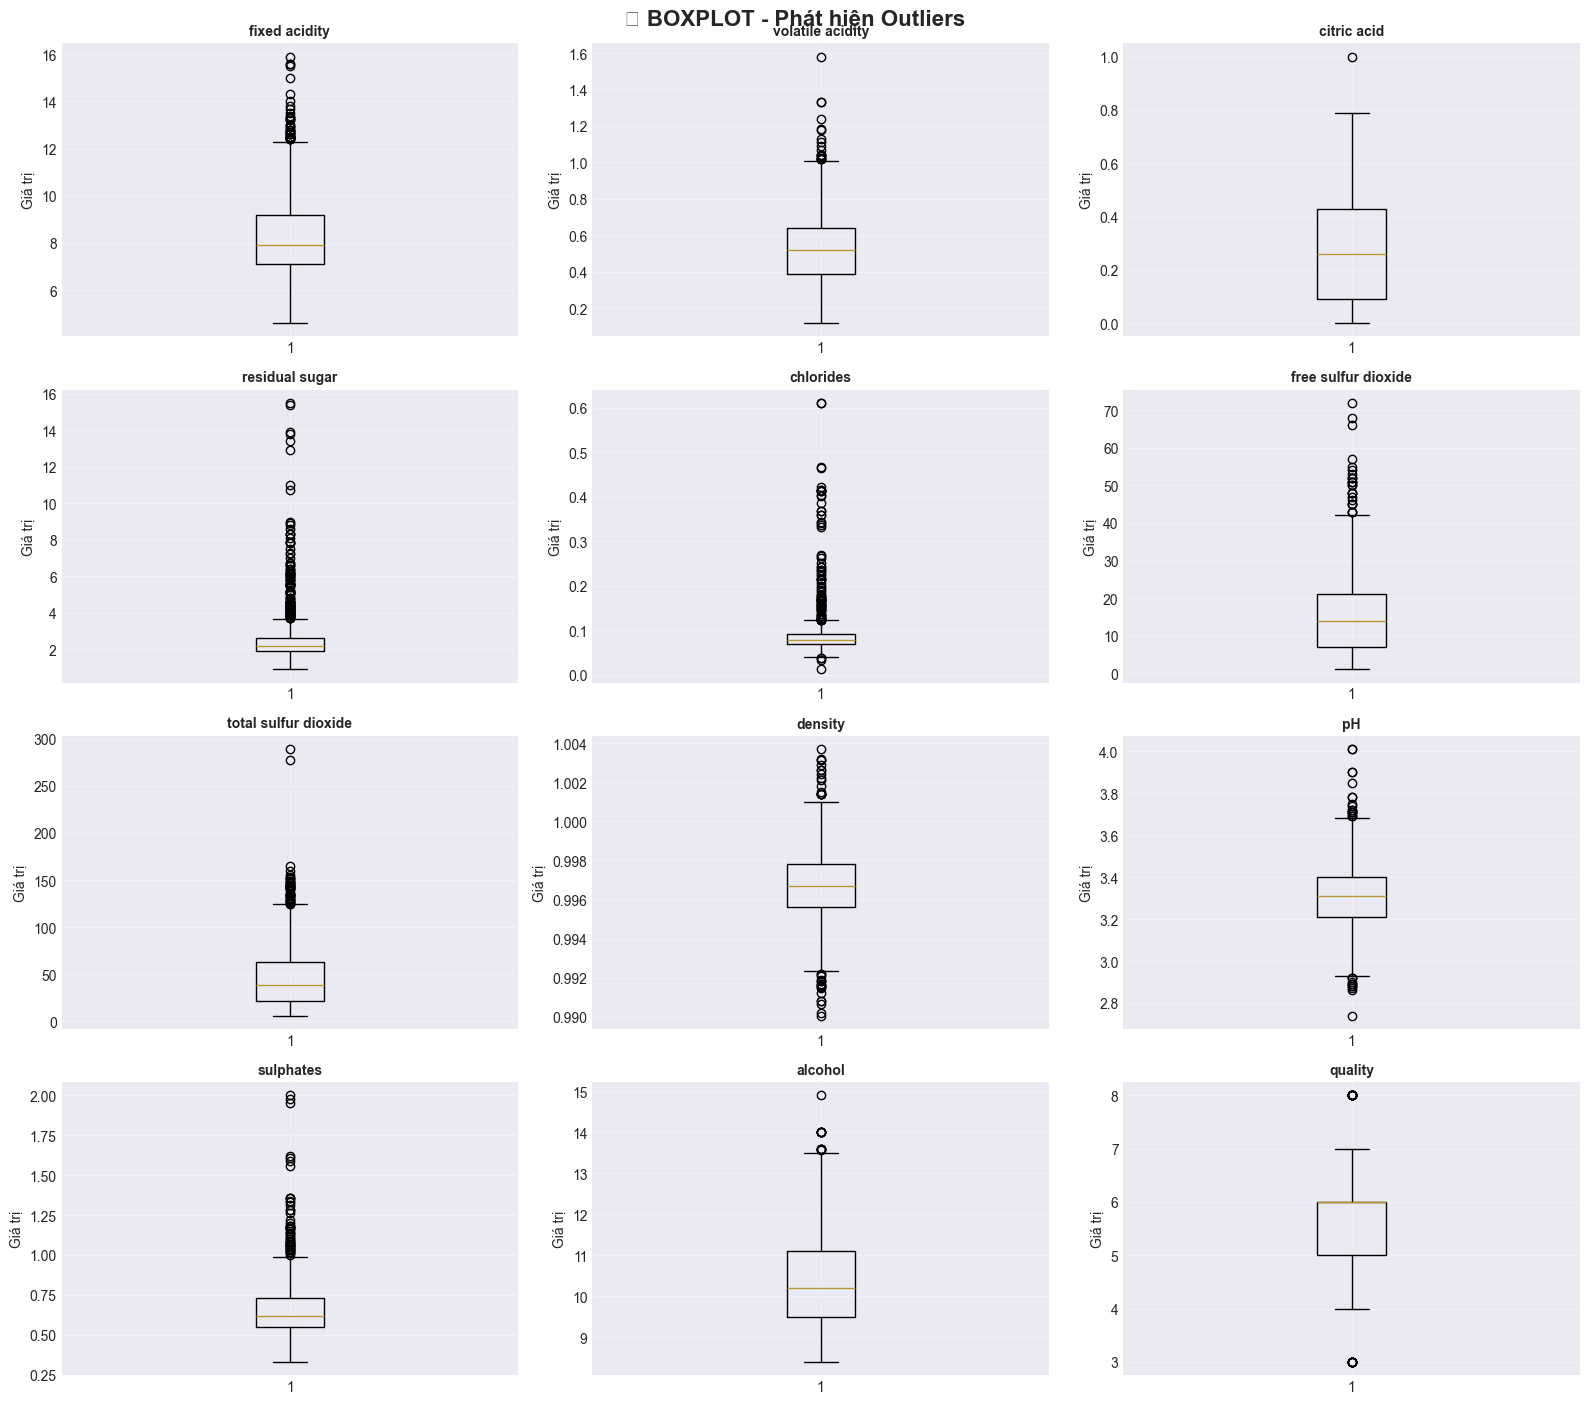

💡 Nhận xét: Các điểm nằm ngoài whiskers (râu) của boxplot là outliers tiềm năng


In [29]:
# Visualize outliers với boxplot
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for i, col in enumerate(df_clean.columns):
    axes[i].boxplot(df_clean[col].dropna(), vert=True)
    axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Giá trị')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📦 BOXPLOT - Phát hiện Outliers', fontsize=16, fontweight='bold', y=1.00)
plt.show()

print("💡 Nhận xét: Các điểm nằm ngoài whiskers (râu) của boxplot là outliers tiềm năng")

### 2.4 Xử lý Outliers bằng phương pháp IQR

In [30]:
def remove_outliers_iqr(df, columns, multiplier=3.0):
    """
    Lọc outlier theo IQR cho nhiều cột cùng lúc (lọc đồng thời, không tích lũy)
    """
    df_out = df.copy()
    outlier_info = []

    # Tính biên IQR cho từng cột
    bounds = {}
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        bounds[col] = (lower_bound, upper_bound)

        # Ghi thống kê
        outliers = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)]
        outlier_info.append({
            'Cột': col,
            'Số outliers': len(outliers),
            'Tỷ lệ (%)': round(len(outliers) / len(df_out) * 100, 2),
            'Lower bound': round(lower_bound, 2),
            'Upper bound': round(upper_bound, 2)
        })

    # Tạo mask toàn cục
    mask = pd.Series(True, index=df_out.index)
    for col, (low, high) in bounds.items():
        mask &= df_out[col].between(low, high)

    # Lọc đồng thời 1 lần
    df_filtered = df_out[mask]
    outlier_rows = df_out[~mask]

    return df_filtered, pd.DataFrame(outlier_info), outlier_rows

df_clean, outlier_summary, outlier_rows = remove_outliers_iqr(df_clean, features, multiplier=3.0)

print("🔍 THỐNG KÊ OUTLIERS THEO IQR METHOD:")
print(outlier_summary.to_string(index=False))
print(f"\n📊 Kích thước dữ liệu:")
print(f"  - Ban đầu: {df.shape}")
print(f"  - Sau khi làm sạch: {df_clean.shape}")
print(f"  - Đã loại bỏ: {len(outlier_rows)} dòng ({len(outlier_rows)/len(df)*100:.2f}%)")


🔍 THỐNG KÊ OUTLIERS THEO IQR METHOD:
                 Cột  Số outliers  Tỷ lệ (%)  Lower bound  Upper bound
       fixed acidity            4       0.29         0.80        15.50
    volatile acidity            1       0.07        -0.36         1.39
         citric acid            0       0.00        -0.93         1.45
      residual sugar           70       5.15        -0.20         4.70
           chlorides           60       4.42         0.01         0.15
 free sulfur dioxide            3       0.22       -35.00        63.00
total sulfur dioxide            2       0.15      -101.00       186.00
             density            0       0.00         0.99         1.00
                  pH            2       0.15         2.64         3.97
           sulphates           15       1.10         0.01         1.27
             alcohol            0       0.00         4.70        15.90

📊 Kích thước dữ liệu:
  - Ban đầu: (1599, 12)
  - Sau khi làm sạch: (1220, 12)
  - Đã loại bỏ: 139 dòng (8.69%

### 2.5 Kiểm tra phân phối Skewness

In [31]:
# Kiểm tra skewness
from scipy.stats import skew

skewness = df_clean[features].apply(lambda x: skew(x.dropna()))
skewness_df = pd.DataFrame({
    'Cột': skewness.index,
    'Skewness': skewness.values.round(2)
}).sort_values('Skewness', key=abs, ascending=False)

print("📊 PHÂN PHỐI SKEWNESS:")
print("="*60)
print(skewness_df.to_string(index=False))
print("\n💡 Giải thích:")
print("  - Skewness ≈ 0: Phân phối cân đối (normal)")
print("  - Skewness > 0: Lệch phải (nhiều giá trị nhỏ)")
print("  - Skewness < 0: Lệch trái (nhiều giá trị lớn)")
print("  - |Skewness| > 1: Lệch mạnh, có thể cần transform")

📊 PHÂN PHỐI SKEWNESS:
                 Cột  Skewness
      residual sugar      1.40
total sulfur dioxide      1.21
           sulphates      1.07
 free sulfur dioxide      1.01
             alcohol      0.84
       fixed acidity      0.82
    volatile acidity      0.64
           chlorides      0.58
         citric acid      0.28
                  pH      0.22
             density     -0.15

💡 Giải thích:
  - Skewness ≈ 0: Phân phối cân đối (normal)
  - Skewness > 0: Lệch phải (nhiều giá trị nhỏ)
  - Skewness < 0: Lệch trái (nhiều giá trị lớn)
  - |Skewness| > 1: Lệch mạnh, có thể cần transform


---

## 📊 Bước 3: Phân tích khám phá & trực quan hóa (Exploratory Visualization)

**Mục tiêu:** Hiểu sâu hơn về cấu trúc, mối tương quan và hành vi dữ liệu.

### 3.1 Phân phối từng biến - Histogram

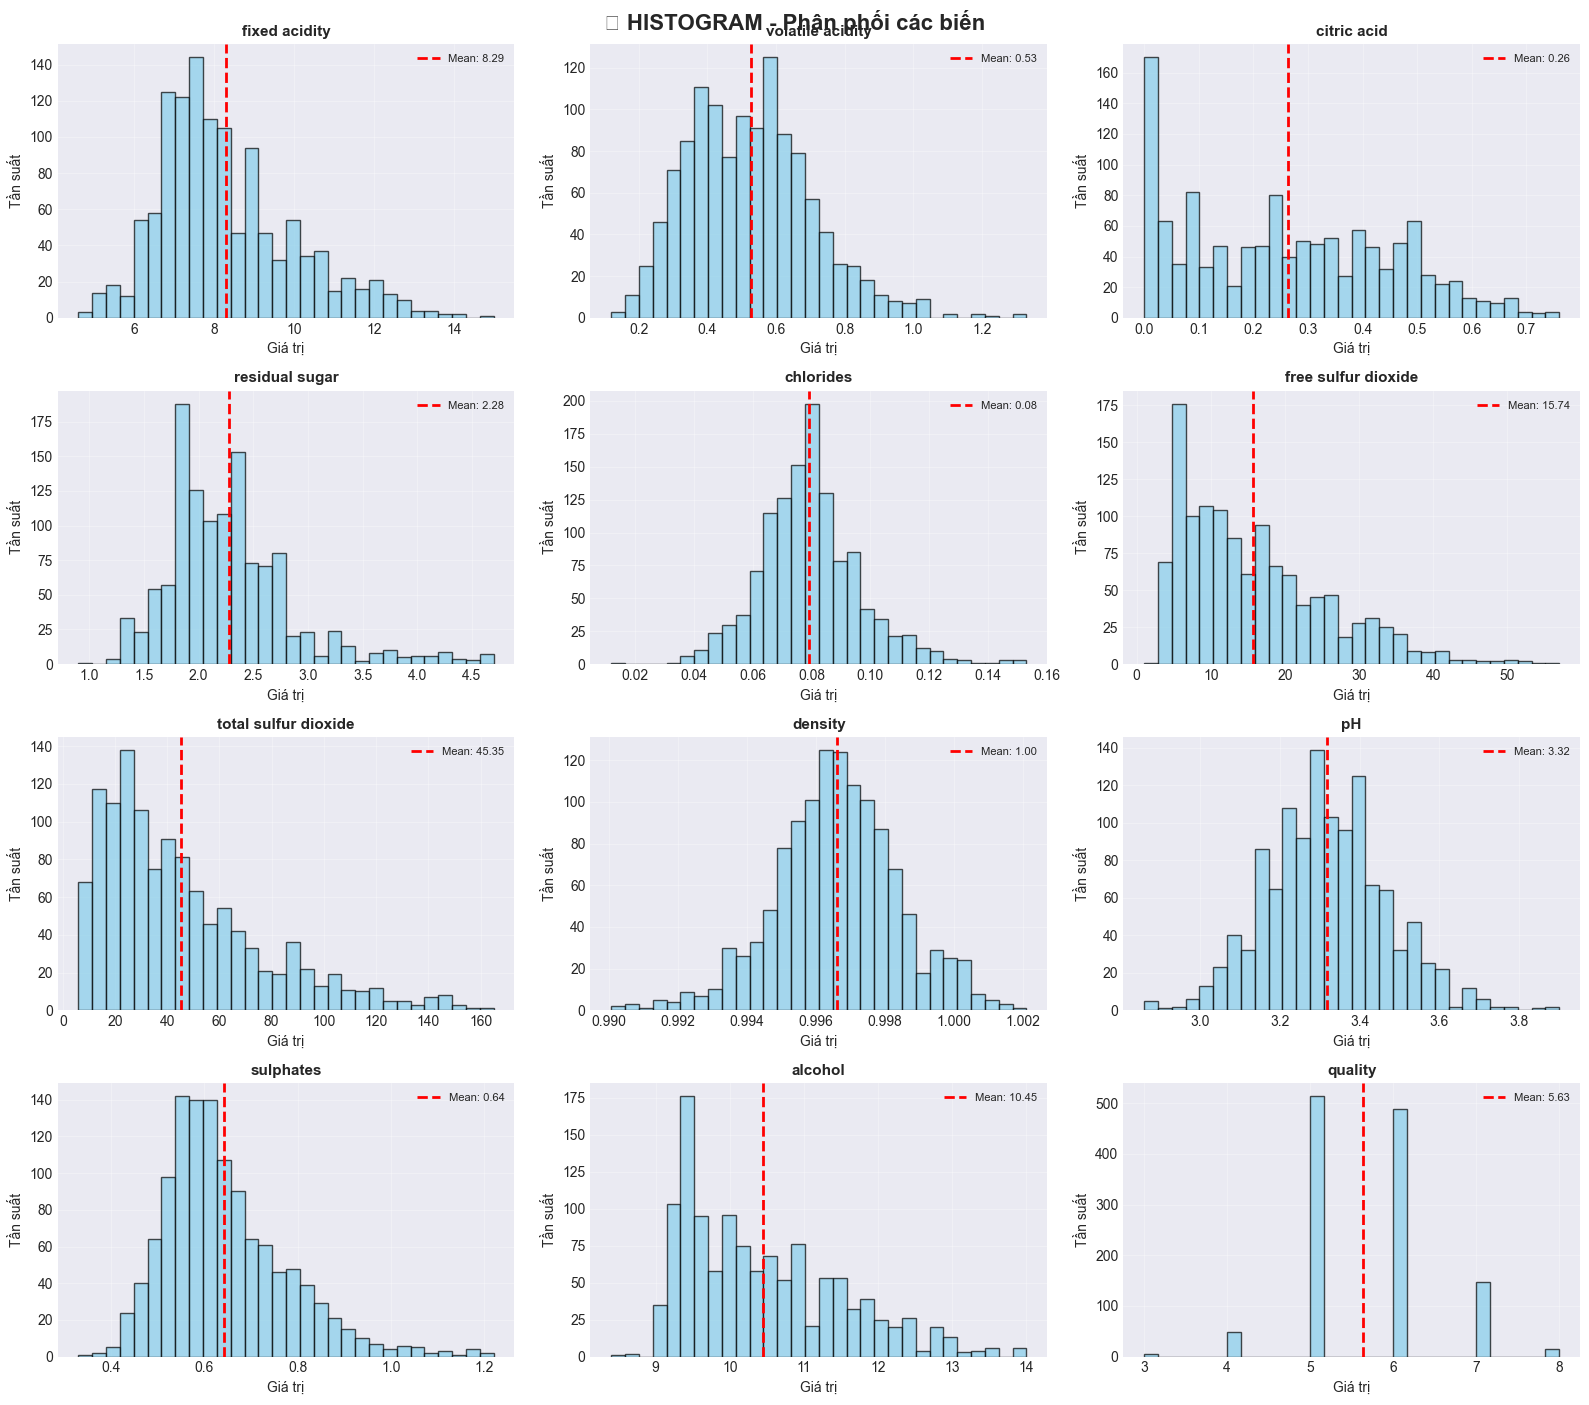

In [32]:
# Histogram cho tất cả các biến
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for i, col in enumerate(df_clean.columns):
    axes[i].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Giá trị')
    axes[i].set_ylabel('Tần suất')
    axes[i].grid(True, alpha=0.3)
    
    # Thêm mean line
    mean_val = df_clean[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.suptitle('📊 HISTOGRAM - Phân phối các biến', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### 3.2 Phân phối biến mục tiêu Quality

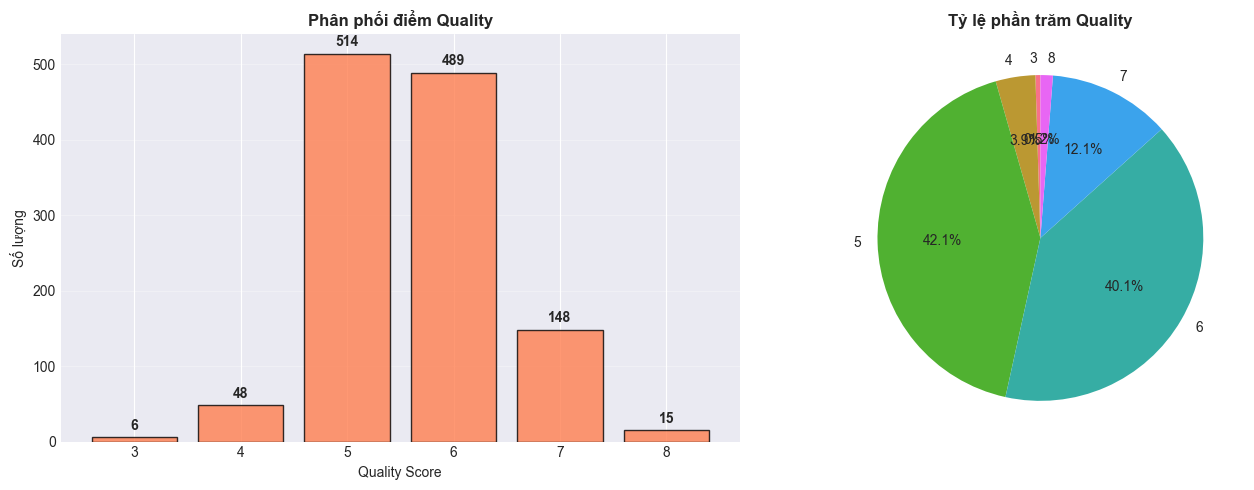

📊 Thống kê Quality:
  - Điểm thấp nhất: 3
  - Điểm cao nhất: 8
  - Điểm trung bình: 5.63
  - Điểm phổ biến nhất: 5


In [33]:
# Phân phối của Quality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
quality_counts = df_clean['quality'].value_counts().sort_index()
axes[0].bar(quality_counts.index, quality_counts.values, edgecolor='black', color='coral', alpha=0.8)
axes[0].set_title('Phân phối điểm Quality', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Số lượng')
axes[0].grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên mỗi cột
for i, v in enumerate(quality_counts.values):
    axes[0].text(quality_counts.index[i], v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('husl', len(quality_counts)))
axes[1].set_title('Tỷ lệ phần trăm Quality', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Thống kê Quality:")
print(f"  - Điểm thấp nhất: {df_clean['quality'].min()}")
print(f"  - Điểm cao nhất: {df_clean['quality'].max()}")
print(f"  - Điểm trung bình: {df_clean['quality'].mean():.2f}")
print(f"  - Điểm phổ biến nhất: {df_clean['quality'].mode()[0]}")

### 3.3 Ma trận tương quan (Correlation Heatmap)

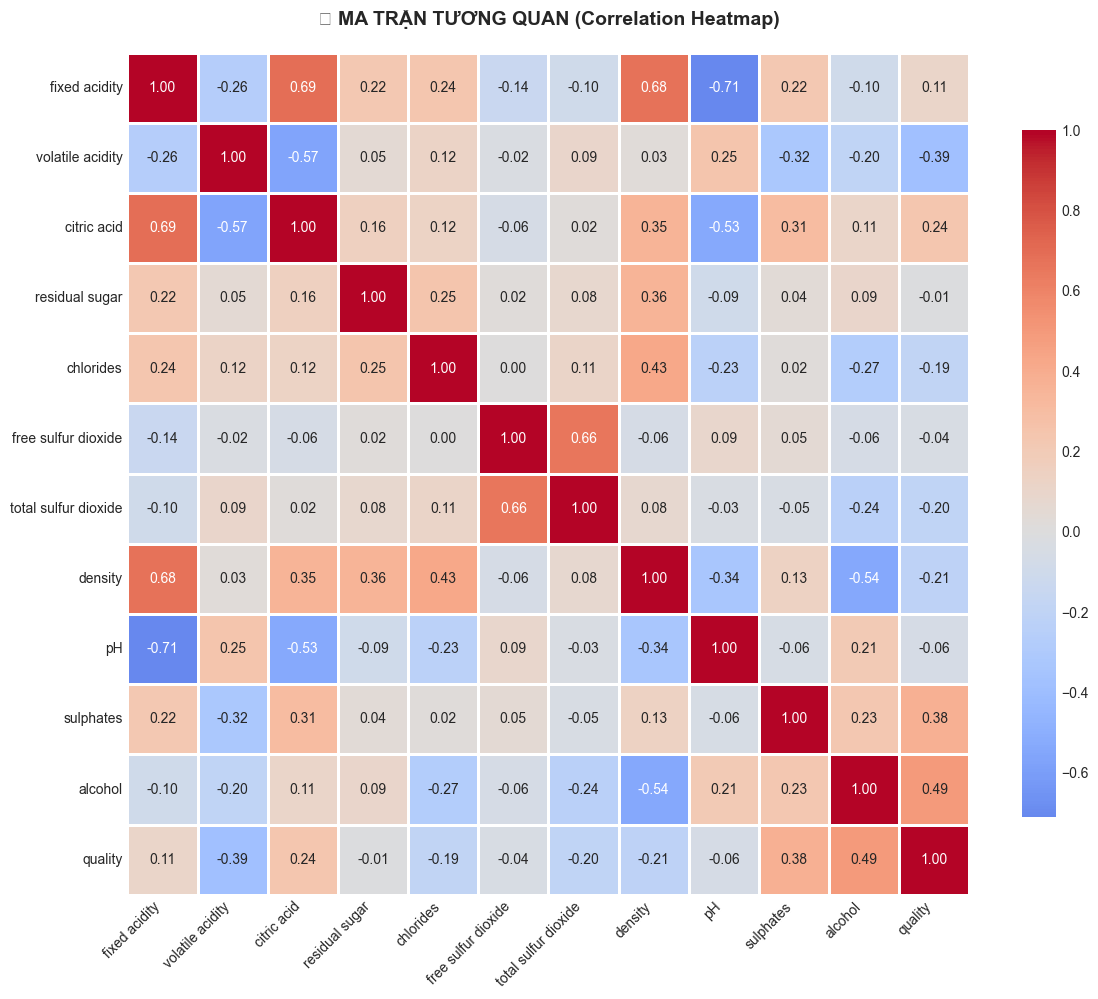

📊 TOP TƯƠNG QUAN VỚI QUALITY:
quality                 1.000000
alcohol                 0.493382
sulphates               0.376819
citric acid             0.238352
fixed acidity           0.108763
residual sugar         -0.011168
free sulfur dioxide    -0.037919
pH                     -0.059966
chlorides              -0.190153
total sulfur dioxide   -0.198476
density                -0.211054
volatile acidity       -0.387690

💡 Nhận xét:
  - Tương quan dương mạnh: Alcohol, Sulphates, Citric Acid
  - Tương quan âm mạnh: Volatile Acidity, Density


In [34]:
# Ma trận tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()

# Tạo heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('🔥 MA TRẬN TƯƠNG QUAN (Correlation Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Hiển thị top correlations với quality
print("📊 TOP TƯƠNG QUAN VỚI QUALITY:")
print("="*60)
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_corr.to_string())

print("\n💡 Nhận xét:")
print("  - Tương quan dương mạnh: Alcohol, Sulphates, Citric Acid")
print("  - Tương quan âm mạnh: Volatile Acidity, Density")

### 3.4 Pairplot cho top features

📊 Top 5 features tương quan mạnh với quality: ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']


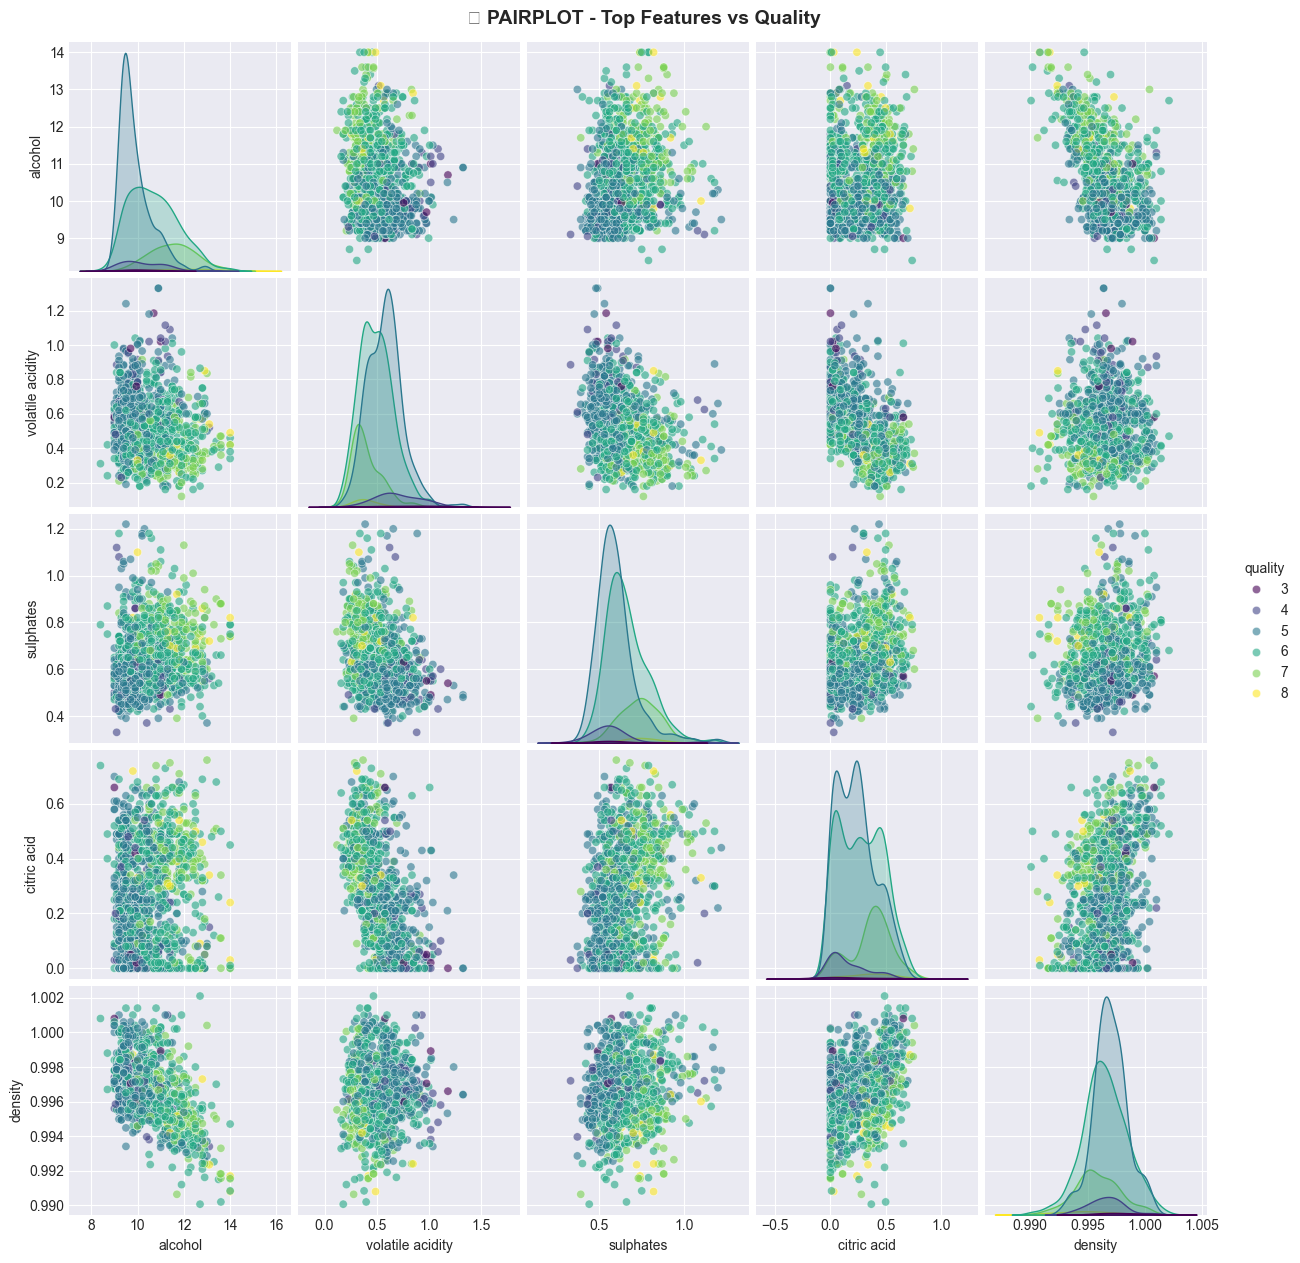

In [35]:
# Chọn top features có tương quan cao nhất với quality
top_features = quality_corr.drop('quality').abs().nlargest(5).index.tolist()
top_features.append('quality')

print(f"📊 Top 5 features tương quan mạnh với quality: {top_features[:-1]}")

# Pairplot
sns.pairplot(df_clean[top_features], hue='quality', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('🎨 PAIRPLOT - Top Features vs Quality', y=1.01, fontsize=14, fontweight='bold')
plt.show()

### 3.5 Boxplot - Features theo Quality

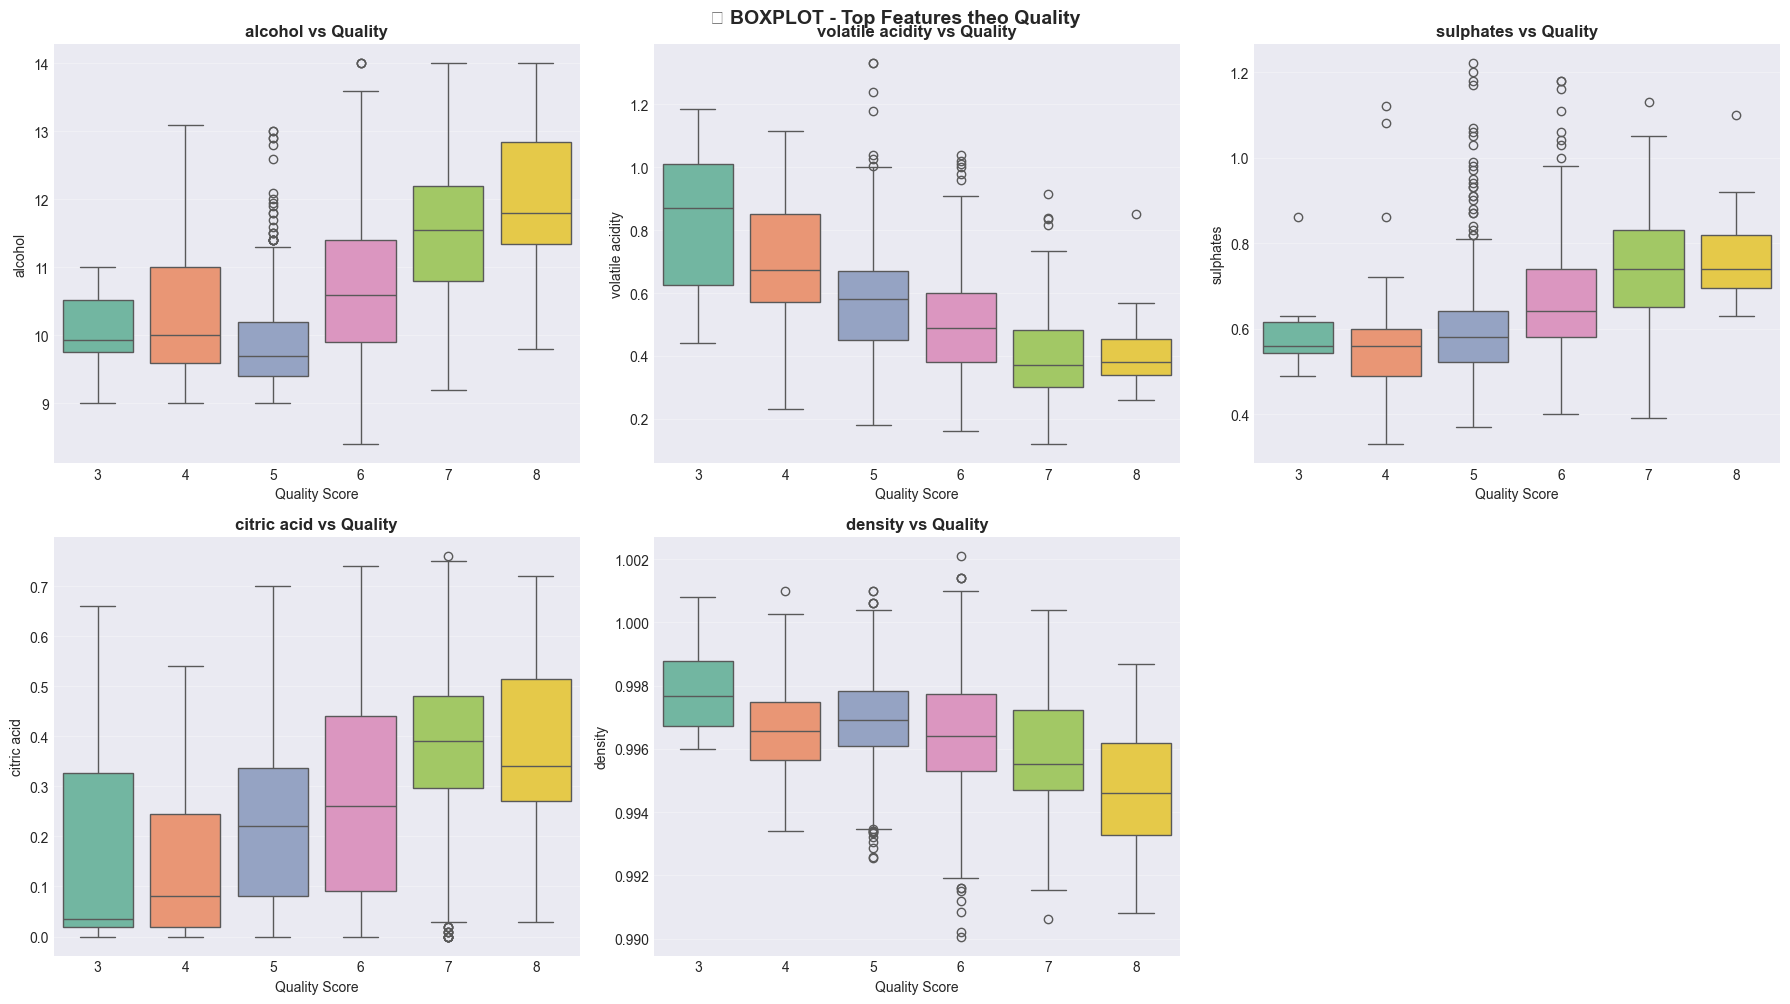

💡 Nhận xét từ Boxplot:
  - Rượu chất lượng cao thường có alcohol cao hơn
  - Volatile acidity thấp → chất lượng tốt hơn
  - Sulphates cao → chất lượng tốt hơn


In [36]:
# Boxplot cho top features theo quality
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features[:-1]):
    sns.boxplot(data=df_clean, x='quality', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs Quality', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Quality Score')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3, axis='y')

# Ẩn subplot thừa
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('📦 BOXPLOT - Top Features theo Quality', fontsize=14, fontweight='bold', y=1.00)
plt.show()

print("💡 Nhận xét từ Boxplot:")
print("  - Rượu chất lượng cao thường có alcohol cao hơn")
print("  - Volatile acidity thấp → chất lượng tốt hơn")
print("  - Sulphates cao → chất lượng tốt hơn")

### 3.6 Violinplot - Phân phối chi tiết theo Quality

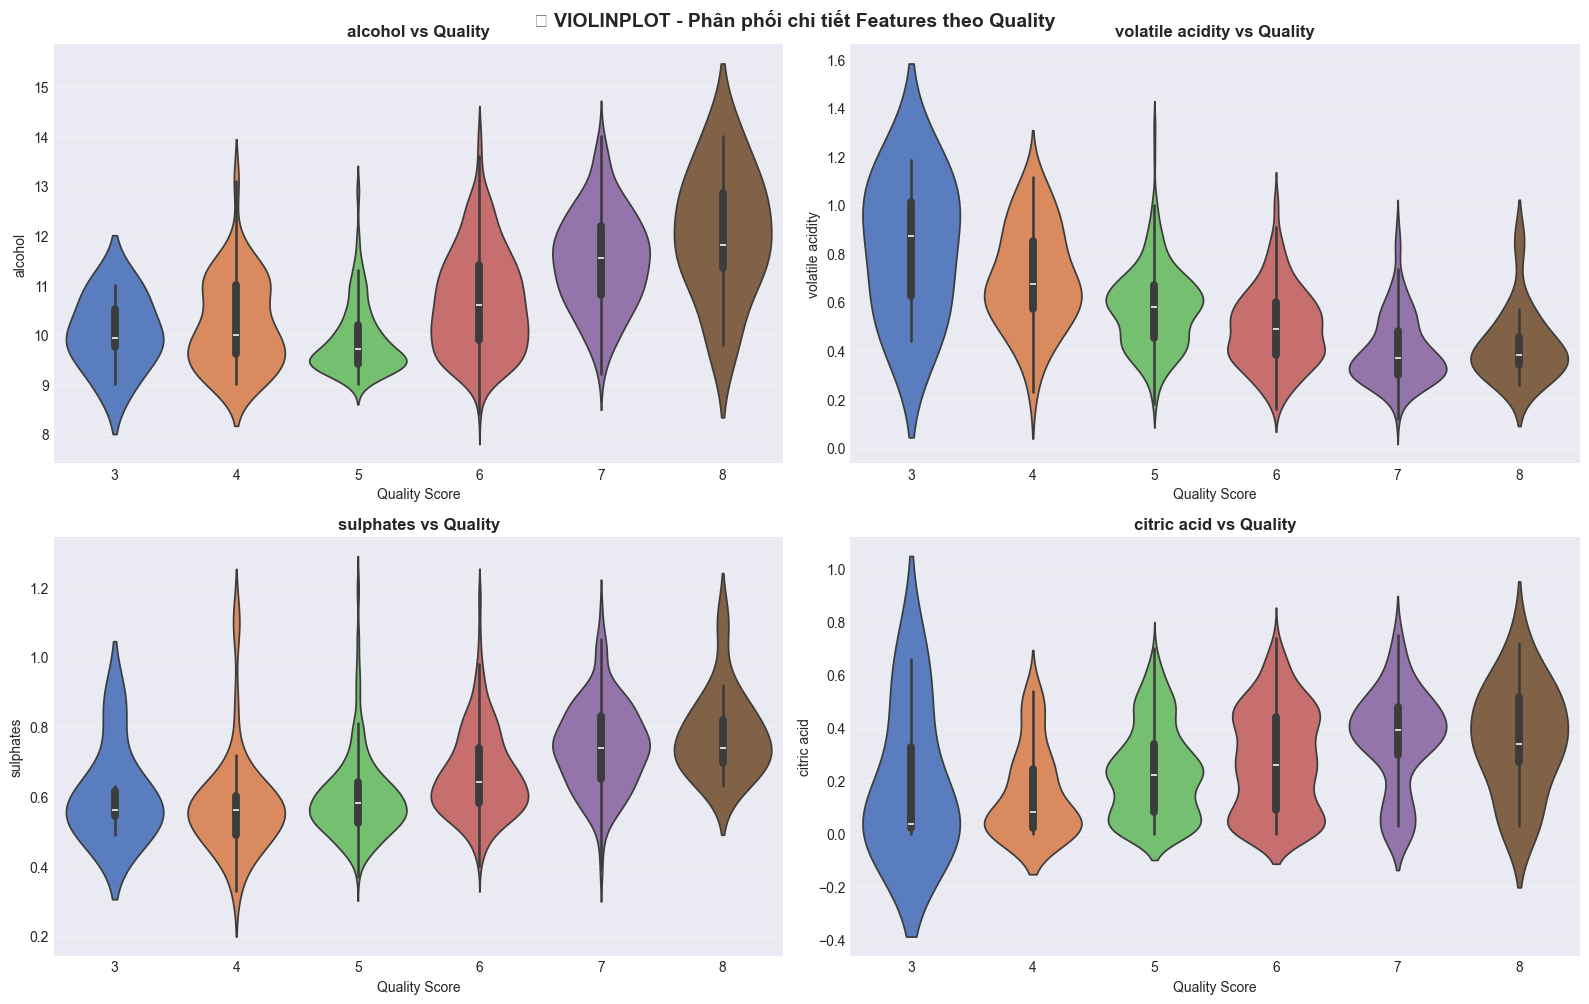

In [37]:
# Violinplot cho các features quan trọng
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

important_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

for i, feature in enumerate(important_features):
    sns.violinplot(data=df_clean, x='quality', y=feature, ax=axes[i], palette='muted')
    axes[i].set_title(f'{feature} vs Quality', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Quality Score')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('🎻 VIOLINPLOT - Phân phối chi tiết Features theo Quality', fontsize=14, fontweight='bold', y=1.00)
plt.show()

### 3.7 Phân nhóm chất lượng (Quality Label)

📊 PHÂN NHÓM CHẤT LƯỢNG:
quality_label
Low       568
Medium    489
High      163
Name: count, dtype: int64

Tổng: 1220 mẫu


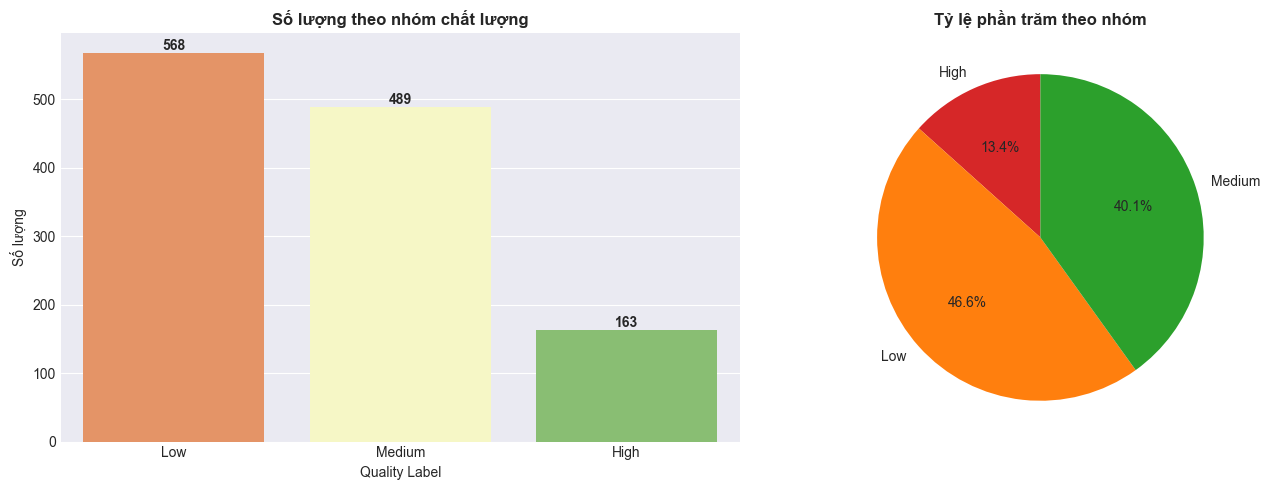

In [38]:
# Tạo phân nhóm chất lượng
def categorize_quality(score):
    if score <= 5:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df_clean['quality_label'] = df_clean['quality'].apply(categorize_quality)

# Thống kê phân nhóm
print("📊 PHÂN NHÓM CHẤT LƯỢNG:")
print("="*60)
quality_dist = df_clean['quality_label'].value_counts()
print(quality_dist)
print(f"\nTổng: {quality_dist.sum()} mẫu")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_clean, x='quality_label', order=['Low', 'Medium', 'High'], 
              palette='RdYlGn', ax=axes[0])
axes[0].set_title('Số lượng theo nhóm chất lượng', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Quality Label')
axes[0].set_ylabel('Số lượng')
for container in axes[0].containers:
    axes[0].bar_label(container, fontweight='bold')

# Pie chart
axes[1].pie(quality_dist.sort_index().values, 
            labels=quality_dist.sort_index().index, 
            autopct='%1.1f%%', startangle=90, colors=['#d62728', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Tỷ lệ phần trăm theo nhóm', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.8 So sánh trung bình Features theo Quality Label

📊 SO SÁNH TRUNG BÌNH FEATURES THEO QUALITY LABEL:
quality_label           Low  Medium   High
fixed acidity          8.11    8.36   8.70
volatile acidity       0.59    0.49   0.40
citric acid            0.22    0.27   0.36
residual sugar         2.29    2.26   2.32
chlorides              0.08    0.08   0.07
free sulfur dioxide   16.26   15.67  14.11
total sulfur dioxide  53.57   39.84  33.24
density                1.00    1.00   1.00
pH                     3.32    3.32   3.30
sulphates              0.59    0.66   0.75
alcohol                9.92   10.69  11.56


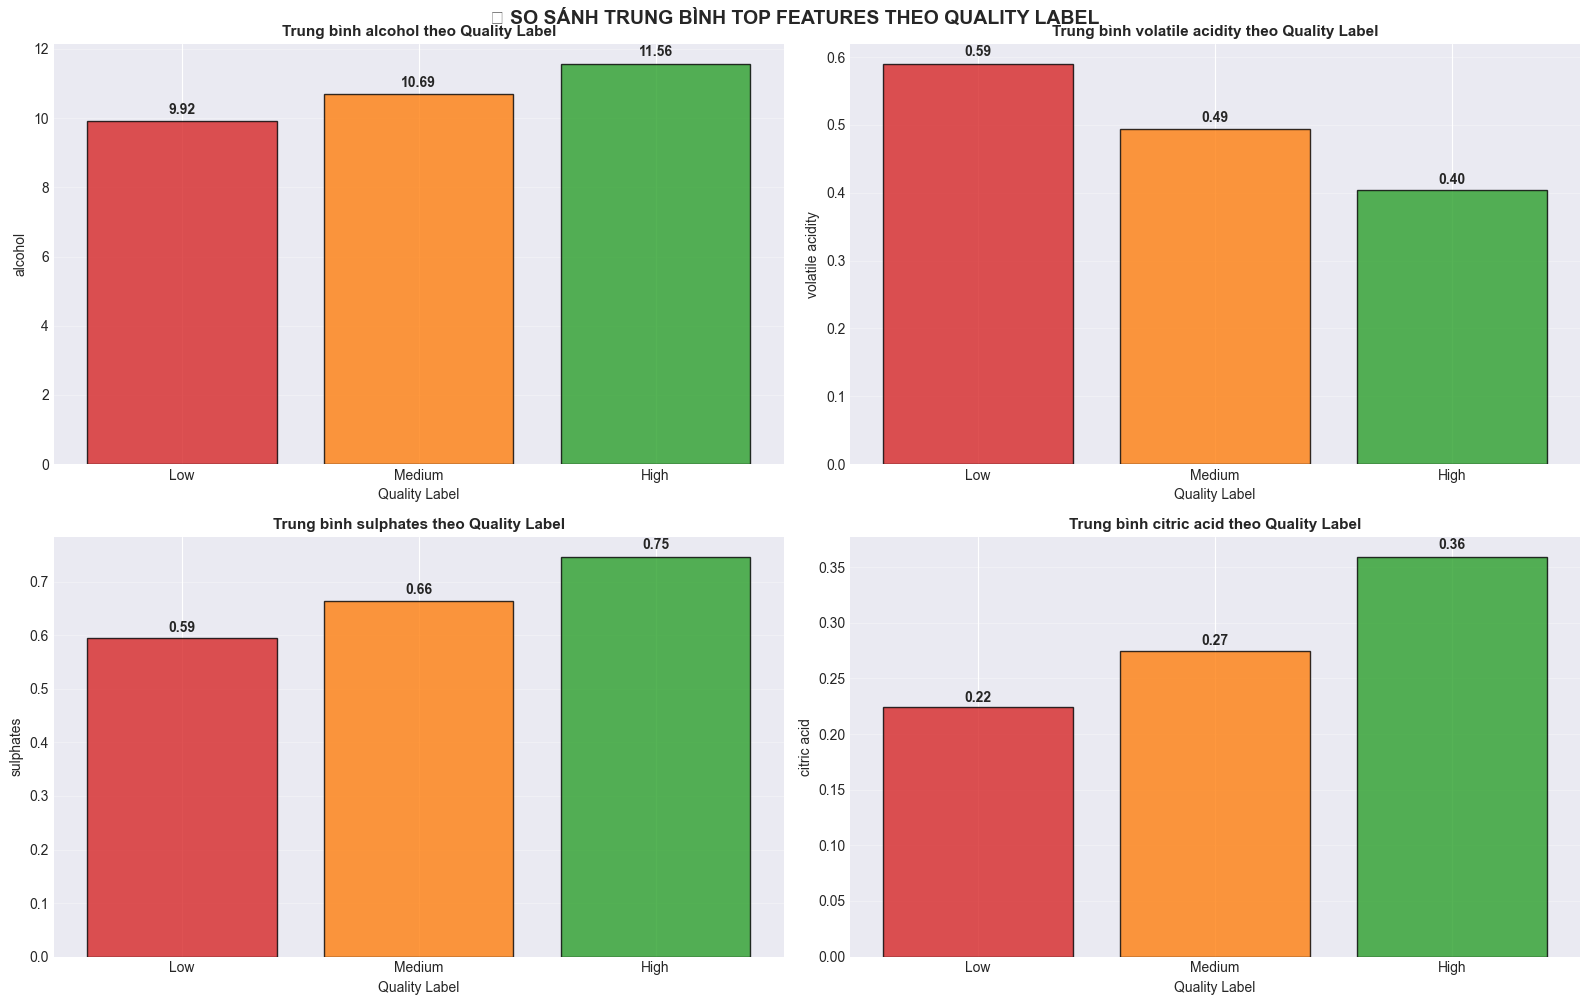

In [39]:
# So sánh giá trị trung bình theo quality label
print("📊 SO SÁNH TRUNG BÌNH FEATURES THEO QUALITY LABEL:")
print("="*80)

comparison = df_clean.groupby('quality_label')[features].mean().round(2)
comparison = comparison.reindex(['Low', 'Medium', 'High'])
print(comparison.T)

# Visualize top features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    data = df_clean.groupby('quality_label')[feature].mean().reindex(['Low', 'Medium', 'High'])
    axes[i].bar(data.index, data.values, color=['#d62728', '#ff7f0e', '#2ca02c'], 
                edgecolor='black', alpha=0.8)
    axes[i].set_title(f'Trung bình {feature} theo Quality Label', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Quality Label')
    axes[i].set_ylabel(f'{feature}')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Thêm giá trị trên cột
    for j, v in enumerate(data.values):
        axes[i].text(j, v + v*0.02, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.suptitle('📊 SO SÁNH TRUNG BÌNH TOP FEATURES THEO QUALITY LABEL', 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()

### 3.9 Linear Model Plot - Mối quan hệ tuyến tính với Quality

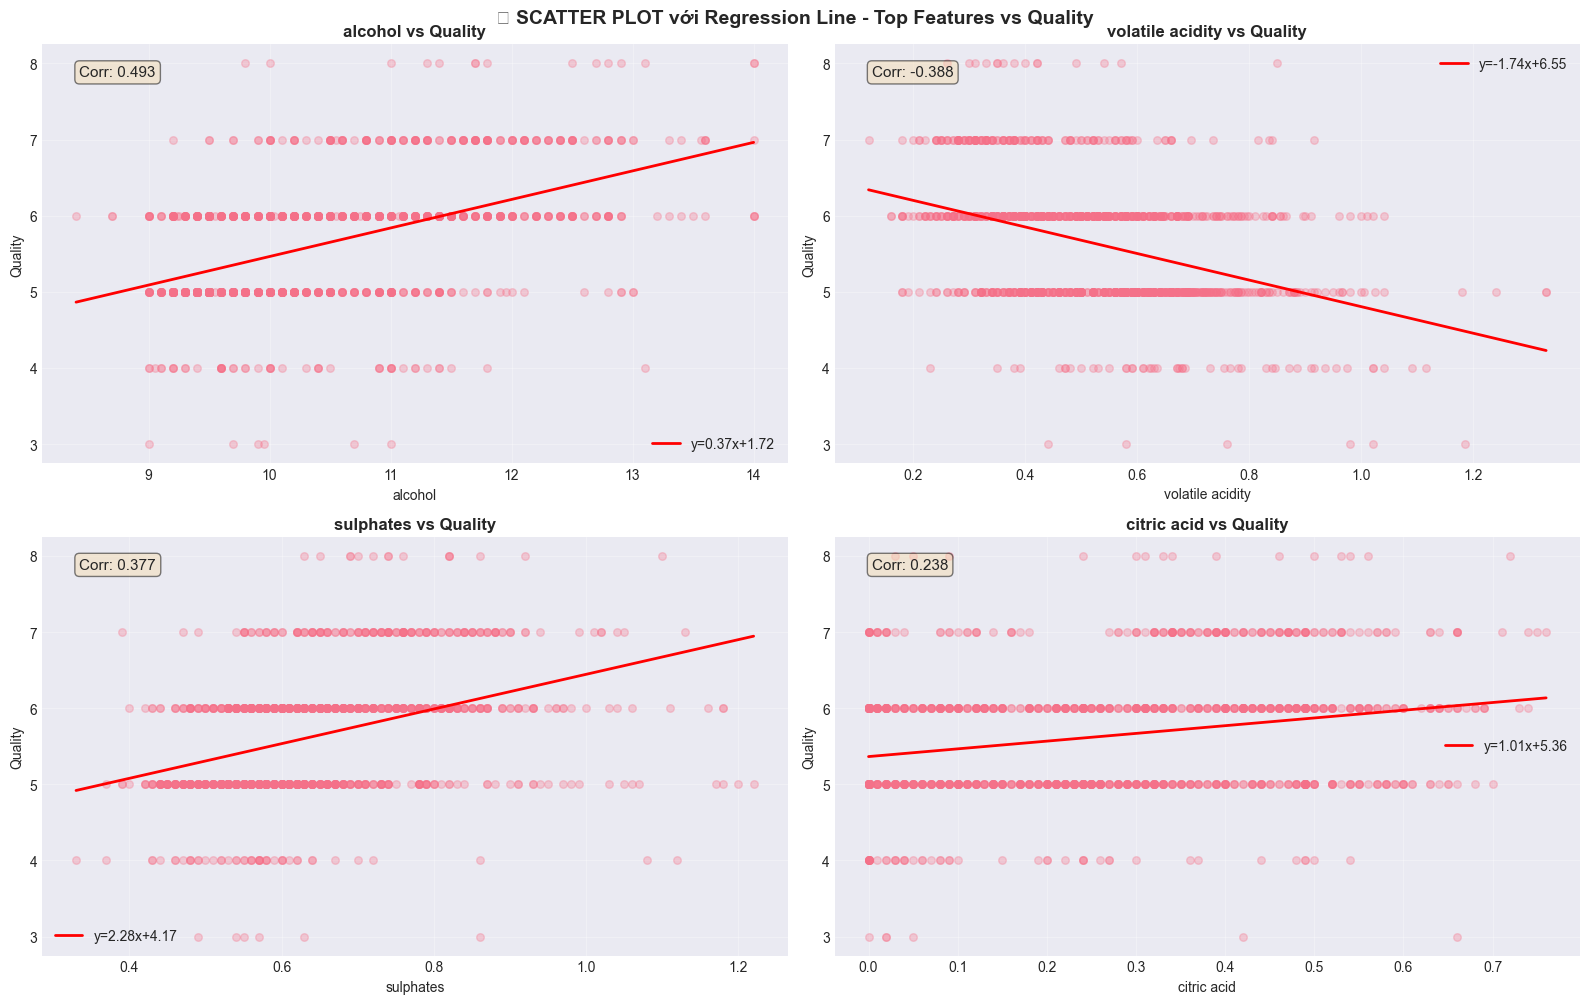

In [40]:
# Scatter plot với regression line cho top features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    axes[i].scatter(df_clean[feature], df_clean['quality'], alpha=0.3, s=30)
    
    # Thêm regression line
    z = np.polyfit(df_clean[feature], df_clean['quality'], 1)
    p = np.poly1d(z)
    axes[i].plot(df_clean[feature].sort_values(), 
                 p(df_clean[feature].sort_values()), 
                 "r-", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
    
    axes[i].set_title(f'{feature} vs Quality', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Quality')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Tính correlation
    corr = df_clean[[feature, 'quality']].corr().iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                transform=axes[i].transAxes, 
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('📈 SCATTER PLOT với Regression Line - Top Features vs Quality', 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()

---

## 🎯 Tổng kết & Insights

### ✅ Những phát hiện quan trọng từ EDA:

In [41]:
# Tổng kết insights
print("="*80)
print("🎯 TỔNG KẾT INSIGHTS TỪ EDA - WINE QUALITY")
print("="*80)

print("\n1️⃣ CHẤT LƯỢNG DỮ LIỆU:")
print(f"   ✅ Dữ liệu sạch, không có missing values")
print(f"   ✅ Đã xử lý {df.shape[0] - df_clean.shape[0]} outliers")
print(f"   ✅ Dataset cuối: {df_clean.shape[0]} mẫu, {df_clean.shape[1]-1} features")

print("\n2️⃣ PHÂN PHỐI CHẤT LƯỢNG:")
quality_dist = df_clean['quality_label'].value_counts()
print(f"   📊 Low Quality: {quality_dist.get('Low', 0)} mẫu")
print(f"   📊 Medium Quality: {quality_dist.get('Medium', 0)} mẫu")
print(f"   📊 High Quality: {quality_dist.get('High', 0)} mẫu")
print(f"   💡 Dữ liệu không cân bằng - nhiều rượu chất lượng trung bình")

print("\n3️⃣ YẾU TỐ ẢNH HƯỞNG TÍCH CỰC ĐẾN CHẤT LƯỢNG:")
quality_corr_positive = quality_corr[quality_corr > 0].sort_values(ascending=False)[1:4]
for feature, corr in quality_corr_positive.items():
    print(f"   ✅ {feature}: {corr:.3f}")
    
print("\n4️⃣ YẾU TỐ ẢNH HƯỞNG TIÊU CỰC ĐẾN CHẤT LƯỢNG:")
quality_corr_negative = quality_corr[quality_corr < 0].sort_values()[0:3]
for feature, corr in quality_corr_negative.items():
    print(f"   ⚠️ {feature}: {corr:.3f}")

print("\n5️⃣ NHẬN XÉT CHI TIẾT:")
print("   🍷 ALCOHOL: Yếu tố quan trọng nhất - rượu có độ cồn cao thường chất lượng tốt hơn")
print("   🍇 VOLATILE ACIDITY: Acid dễ bay hơi cao → vị giấm không mong muốn → chất lượng kém")
print("   ⚗️ SULPHATES: Hàm lượng sulfate cao giúp bảo quản tốt → chất lượng tốt hơn")
print("   🍋 CITRIC ACID: Tạo vị tươi mát, ảnh hưởng tích cực đến chất lượng")
print("   💧 DENSITY: Khối lượng riêng cao (nhiều đường, ít cồn) → chất lượng thấp hơn")

print("\n6️⃣ ĐỀ XUẤT CHO MACHINE LEARNING:")
print("   🤖 Features quan trọng nhất: alcohol, volatile acidity, sulphates, citric acid")
print("   🤖 Có thể cần xử lý imbalanced data (SMOTE, class weights)")
print("   🤖 Xem xét feature engineering: tỷ lệ acid, tổng SO2/free SO2")
print("   🤖 Thử các model: Random Forest, Gradient Boosting, Neural Networks")

print("\n" + "="*80)
print("✅ EDA HOÀN TẤT - DỮ LIỆU SẴN SÀNG CHO MODELING!")
print("="*80)

🎯 TỔNG KẾT INSIGHTS TỪ EDA - WINE QUALITY

1️⃣ CHẤT LƯỢNG DỮ LIỆU:
   ✅ Dữ liệu sạch, không có missing values
   ✅ Đã xử lý 379 outliers
   ✅ Dataset cuối: 1220 mẫu, 12 features

2️⃣ PHÂN PHỐI CHẤT LƯỢNG:
   📊 Low Quality: 568 mẫu
   📊 Medium Quality: 489 mẫu
   📊 High Quality: 163 mẫu
   💡 Dữ liệu không cân bằng - nhiều rượu chất lượng trung bình

3️⃣ YẾU TỐ ẢNH HƯỞNG TÍCH CỰC ĐẾN CHẤT LƯỢNG:
   ✅ alcohol: 0.493
   ✅ sulphates: 0.377
   ✅ citric acid: 0.238

4️⃣ YẾU TỐ ẢNH HƯỞNG TIÊU CỰC ĐẾN CHẤT LƯỢNG:
   ⚠️ volatile acidity: -0.388
   ⚠️ density: -0.211
   ⚠️ total sulfur dioxide: -0.198

5️⃣ NHẬN XÉT CHI TIẾT:
   🍷 ALCOHOL: Yếu tố quan trọng nhất - rượu có độ cồn cao thường chất lượng tốt hơn
   🍇 VOLATILE ACIDITY: Acid dễ bay hơi cao → vị giấm không mong muốn → chất lượng kém
   ⚗️ SULPHATES: Hàm lượng sulfate cao giúp bảo quản tốt → chất lượng tốt hơn
   🍋 CITRIC ACID: Tạo vị tươi mát, ảnh hưởng tích cực đến chất lượng
   💧 DENSITY: Khối lượng riêng cao (nhiều đường, ít cồn) → ch

### 📝 Export dữ liệu đã làm sạch (Optional)

In [42]:
# Export dữ liệu đã làm sạch để sử dụng cho modeling
# df_clean.to_csv('winequality_red_cleaned.csv', index=False)
# print("✅ Đã export dữ liệu đã làm sạch vào 'winequality_red_cleaned.csv'")

print("💡 Uncomment dòng trên nếu muốn lưu dữ liệu đã làm sạch")

💡 Uncomment dòng trên nếu muốn lưu dữ liệu đã làm sạch
